# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&q={city}"
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 84
    },
    "cod": 200,
    "coord": {
        "lat": 7.4178,
        "lon": 6.7371
    },
    "dt": 1701479190,
    "id": 2351470,
    "main": {
        "feels_like": 298.99,
        "grnd_level": 1003,
        "humidity": 63,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 298.73,
        "temp_max": 298.73,
        "temp_min": 298.73
    },
    "name": "Alo",
    "sys": {
        "country": "NG",
        "sunrise": 1701495053,
        "sunset": 1701537246
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 184,
        "gust": 1.31,
        "speed": 1.18
    }
}


In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapuskasing
Processing Record 2 of Set 1 | lubang
Processing Record 3 of Set 1 | alotau
City not found. Skipping...
Processing Record 4 of Set 1 | urangan
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | flying fish cove
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | giado
Processing Record 12 of Set 1 | tommot
Processing Record 13 of Set 1 | kralupy nad vltavou
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | truth or consequences
Processing Record 18 of Set 1 | tralee
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | la ronge
Processing Record 21 of Set 1 | nea alikarnassos
Processing Record 22 

Processing Record 37 of Set 4 | bandar abbas
Processing Record 38 of Set 4 | vorkuta
Processing Record 39 of Set 4 | tamanrasset
Processing Record 40 of Set 4 | saint-pierre
Processing Record 41 of Set 4 | leer
Processing Record 42 of Set 4 | mpulungu
Processing Record 43 of Set 4 | hobyo
Processing Record 44 of Set 4 | i-n-salah
Processing Record 45 of Set 4 | thunder bay
Processing Record 46 of Set 4 | sisimiut
Processing Record 47 of Set 4 | petropavlovsk-kamchatsky
Processing Record 48 of Set 4 | kingston
Processing Record 49 of Set 4 | chonchi
Processing Record 0 of Set 5 | qui nhon
Processing Record 1 of Set 5 | whitehorse
Processing Record 2 of Set 5 | cassano delle murge
Processing Record 3 of Set 5 | ritchie
Processing Record 4 of Set 5 | ariquemes
Processing Record 5 of Set 5 | tolanaro
Processing Record 6 of Set 5 | usinsk
Processing Record 7 of Set 5 | igoumenitsa
Processing Record 8 of Set 5 | hirara
Processing Record 9 of Set 5 | jomboy shahri
City not found. Skipping...


Processing Record 26 of Set 8 | kataragama
City not found. Skipping...
Processing Record 27 of Set 8 | karwar
Processing Record 28 of Set 8 | along
Processing Record 29 of Set 8 | pacocha
Processing Record 30 of Set 8 | djambala
Processing Record 31 of Set 8 | pisco
Processing Record 32 of Set 8 | jayapura
Processing Record 33 of Set 8 | el limon
Processing Record 34 of Set 8 | papao
Processing Record 35 of Set 8 | rovaniemi
Processing Record 36 of Set 8 | saudarkrokur
Processing Record 37 of Set 8 | kone
Processing Record 38 of Set 8 | leava
Processing Record 39 of Set 8 | prabumulih
Processing Record 40 of Set 8 | santa marta
Processing Record 41 of Set 8 | beohari
Processing Record 42 of Set 8 | gadzhiyevo
Processing Record 43 of Set 8 | tsiombe
Processing Record 44 of Set 8 | udachny
Processing Record 45 of Set 8 | mugia
Processing Record 46 of Set 8 | callao
Processing Record 47 of Set 8 | casarsa della delizia
Processing Record 48 of Set 8 | kaset sombun
Processing Record 49 of S

Processing Record 19 of Set 12 | asau
Processing Record 20 of Set 12 | kerikeri
Processing Record 21 of Set 12 | pangai
Processing Record 22 of Set 12 | bogale
Processing Record 23 of Set 12 | pionerskiy
Processing Record 24 of Set 12 | peace river
Processing Record 25 of Set 12 | bang saphan
Processing Record 26 of Set 12 | kidal
Processing Record 27 of Set 12 | north bend
Processing Record 28 of Set 12 | dhulikhel
Processing Record 29 of Set 12 | oranjemund
Processing Record 30 of Set 12 | alo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity',
                           'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapuskasing,49.4169,-82.4331,266.20,79,100,2.57,CA,1701478971
1,lubang,13.8584,120.1240,300.76,79,19,11.54,PH,1701479418
2,urangan,-25.3000,152.9000,299.01,85,55,8.36,AU,1701479418
3,ribeira grande,38.5167,-28.7000,290.80,84,100,8.49,PT,1701479418
4,carnarvon,-24.8667,113.6333,297.82,71,9,6.97,AU,1701479002


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,266.20,79,100,2.57,CA,1701478971
1,lubang,13.8584,120.1240,300.76,79,19,11.54,PH,1701479418
2,urangan,-25.3000,152.9000,299.01,85,55,8.36,AU,1701479418
3,ribeira grande,38.5167,-28.7000,290.80,84,100,8.49,PT,1701479418
4,carnarvon,-24.8667,113.6333,297.82,71,9,6.97,AU,1701479002


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [22]:
column_type = city_data_df['Lat'].dtype
column_type

dtype('float64')

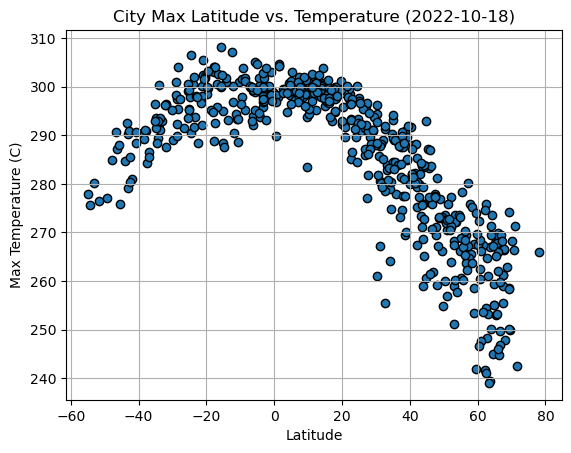

In [68]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

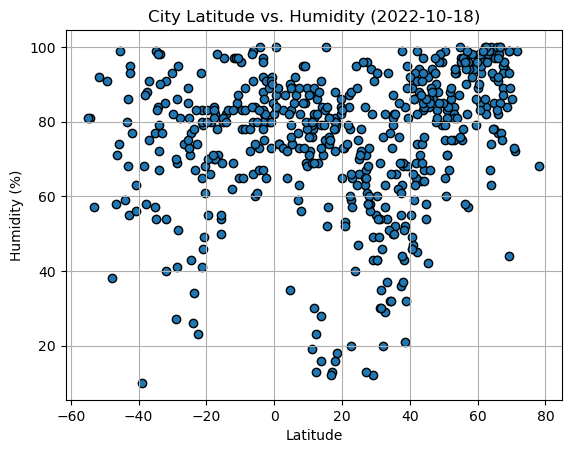

In [67]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

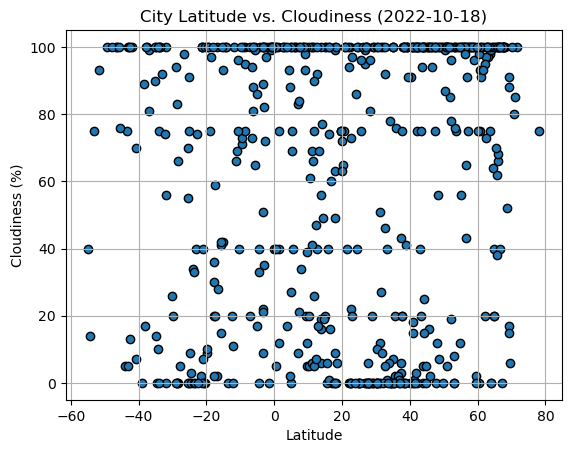

In [66]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

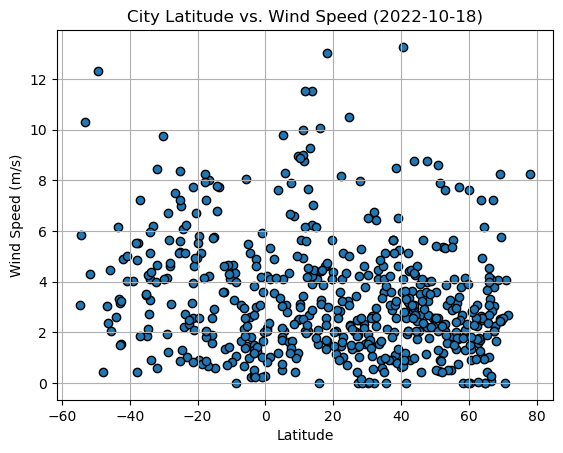

In [65]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def lin_regression(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,266.20,79,100,2.57,CA,1701478971
1,lubang,13.8584,120.1240,300.76,79,19,11.54,PH,1701479418
3,ribeira grande,38.5167,-28.7000,290.80,84,100,8.49,PT,1701479418
7,enewetak,11.3474,162.3373,300.83,78,66,8.75,MH,1701479419
8,tiksi,71.6872,128.8694,242.59,99,100,2.68,RU,1701478969


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,urangan,-25.3000,152.9000,299.01,85,55,8.36,AU,1701479418
4,carnarvon,-24.8667,113.6333,297.82,71,9,6.97,AU,1701479002
5,flying fish cove,-10.4217,105.6791,300.97,65,40,4.12,CX,1701479419
6,avarua,-21.2078,-159.7750,300.18,83,100,7.72,CK,1701479050
12,port-aux-francais,-49.3500,70.2167,277.18,91,100,12.32,TF,1701479014


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7826040180048472


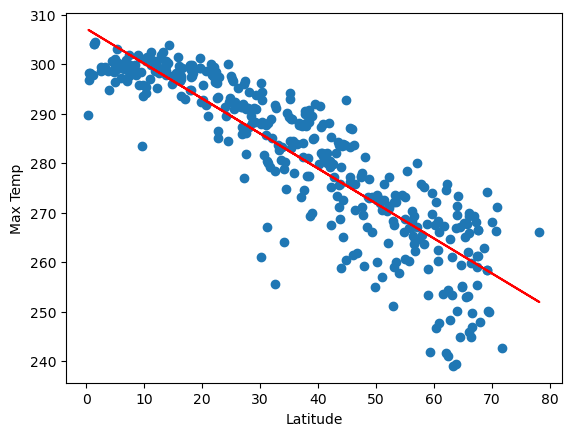

In [54]:
# Linear regression on Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Max Temp")

The r-squared is: 0.4449406611443202


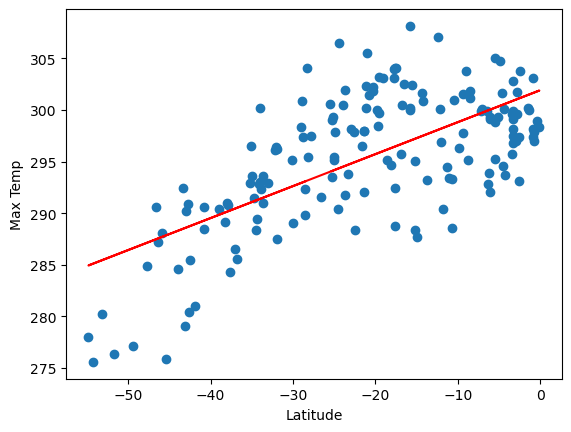

In [55]:
# Linear regression on Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", "Max Temp")

**Discussion about the linear relationship:** For the linear regression performed on the Northern Hemisphere produces an r-squared value greater than 0.7; this indicates a strong correlation between the latitude and the max temperature in the Northern Hemisphere. Given the r-squared value greater than 0.3 and less that 0.5, this demonstrates a weak correlation between the latitude and the max temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.10616004205713883


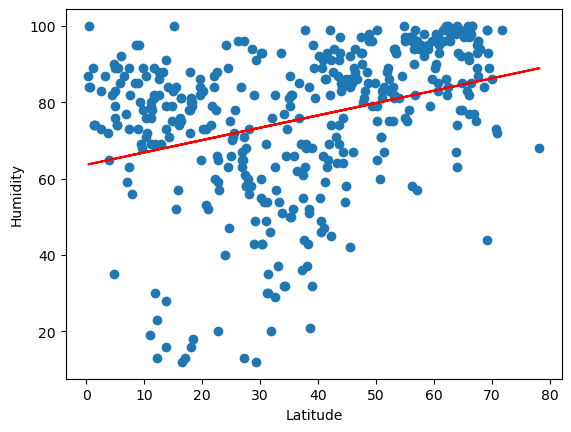

In [56]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", "Humidity")

The r-squared is: 0.04202614783653959


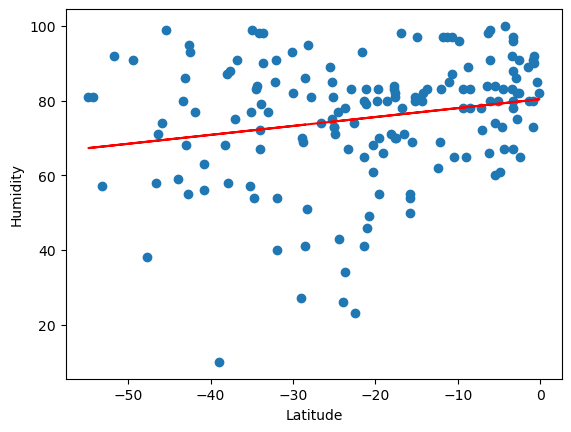

In [57]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", "Humidity")

**Discussion about the linear relationship:** The linear regressions performed on the data for both the Northern and Southern Hemispheres produce r-squared values less than 0.3, which indicates there is a very weak and no correlation between the latitude and humidity, respectively. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03868250571104233


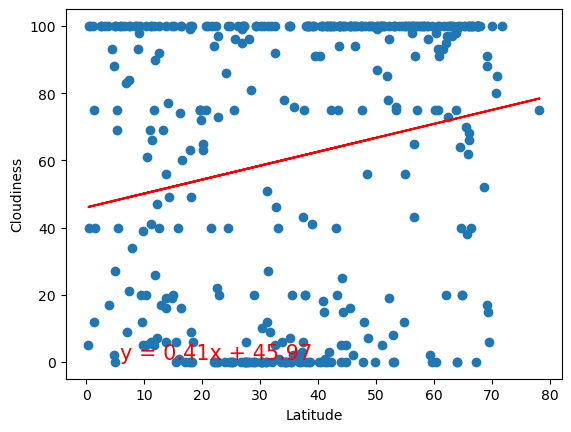

In [58]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness")

The r-squared is: 0.00678619288950253


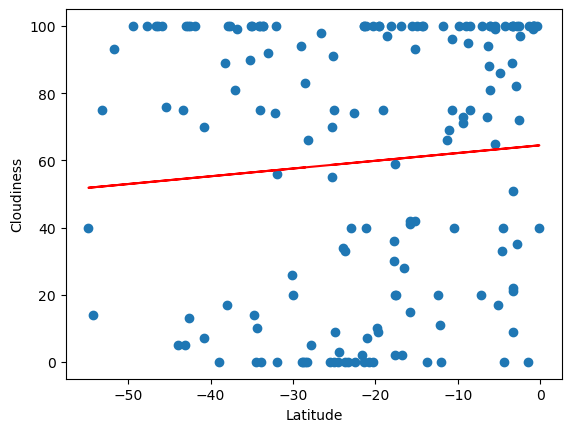

In [60]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** The linear regressions performed on the data for both the Northern and Southern Hemispheres produce r-squared values that are significantly less than 0.3, which indicates there is no correlation between the latitude and cloudiness for both sets of data.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.027662004203275328


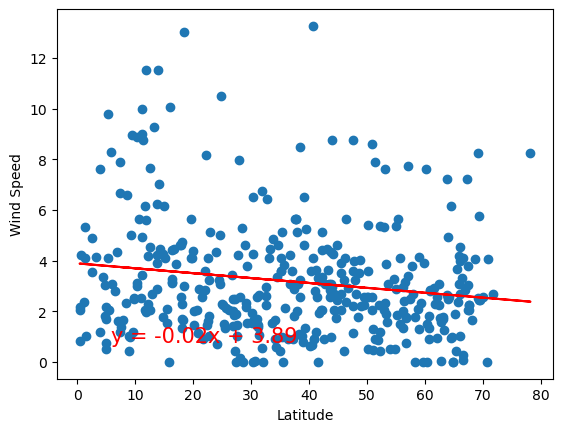

In [61]:
# Northern Hemisphere
lin_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed")

The r-squared is: 0.08197770360593788


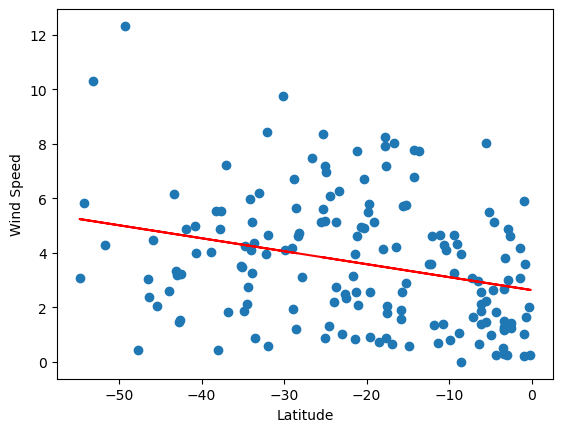

In [62]:
# Southern Hemisphere
lin_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** The linear regressions performed on the data for both the Northern and Southern Hemispheres produce r-squared values that are significantly less than 0.3, which indicates there is no correlation between the latitude and wind speed for both sets of data.